**Digital Ads Data:**


The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.


The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

The Data Dictionary and the detailed description of the formulas for CPM, CPC and CTR are given in the sheet 2 of the Clustering Clean ads_data Excel File. 

**Perform the following in given order:**

* Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Solution File to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing. 

*  Check if there are any outliers.

*  Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

* Perform z-score scaling and discuss how it affects the speed of the algorithm.


* Conclude the project by providing summary of your learnings.

**PCA:**

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel('Clustering+Clean+Ads_Data.xlsx')



*   Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.


In [29]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [30]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [33]:
df.duplicated().sum()

0

In [34]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [35]:
def impute_missing(df, col1, col2, col3):

    df[col1] = df[col1].fillna((df[col1].mean()))
    df[col2] = df[col2].fillna((df[col2].mean()))
    df[col3] = df[col3].fillna((df[col3].mean()))

In [36]:
impute_missing(df, 'CPC', 'CTR', 'CPM')

In [37]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

Creating new dataset droping categorical columns 

In [38]:
new_df = df.drop(['Timestamp','InventoryType', 'Ad Type','Platform','Device Type','Format'], axis=1)

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  int64  
 3   Available_Impressions  23066 non-null  int64  
 4   Matched_Queries        23066 non-null  int64  
 5   Impressions            23066 non-null  int64  
 6   Clicks                 23066 non-null  int64  
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.3 MB


Checking the distribution and outliers for each column in the data

Ad- Width
Skew : 0.21


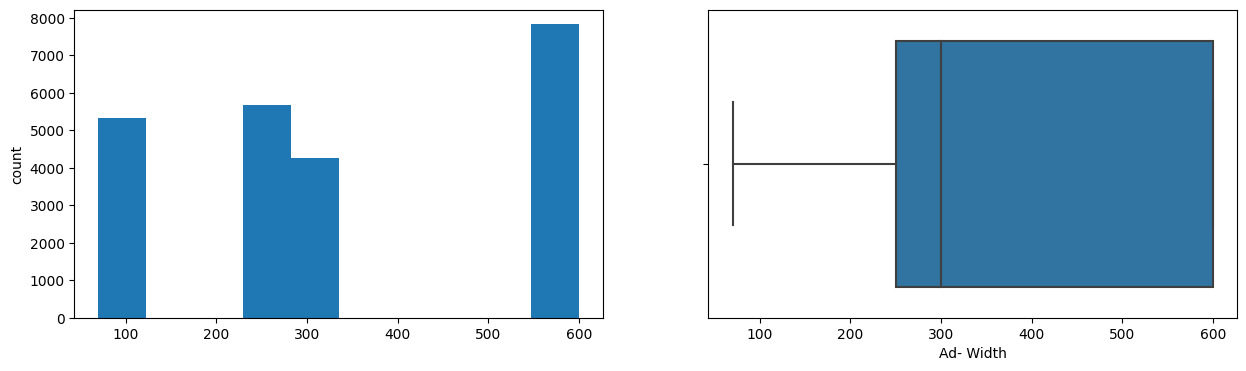

Ad Size
Skew : 1.21


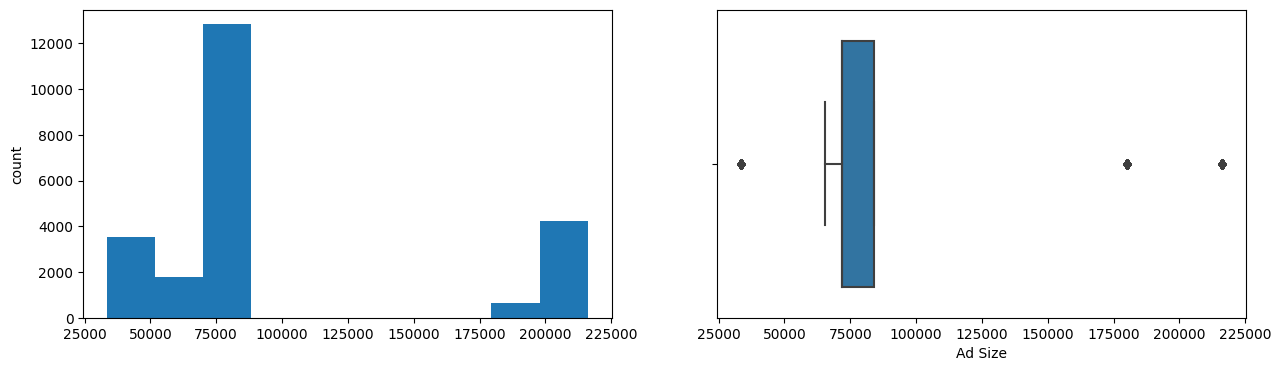

Available_Impressions
Skew : 3.07


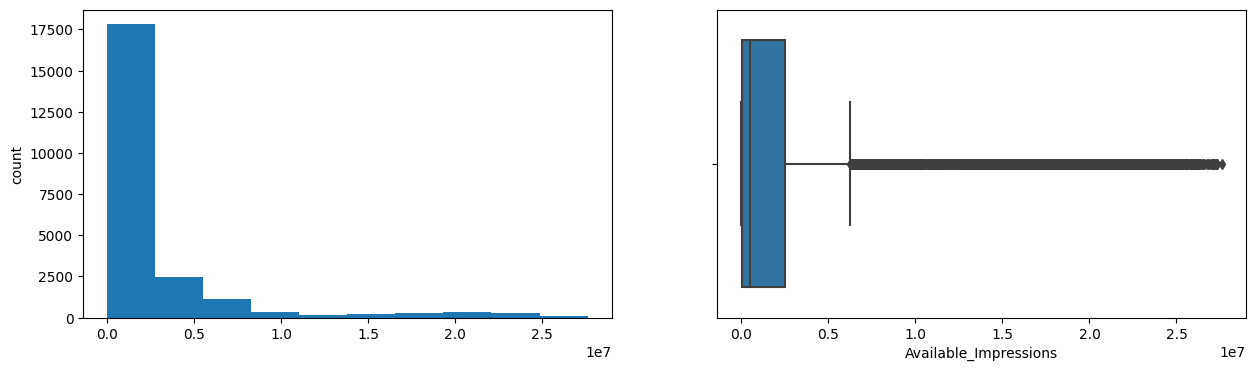

Matched_Queries
Skew : 2.98


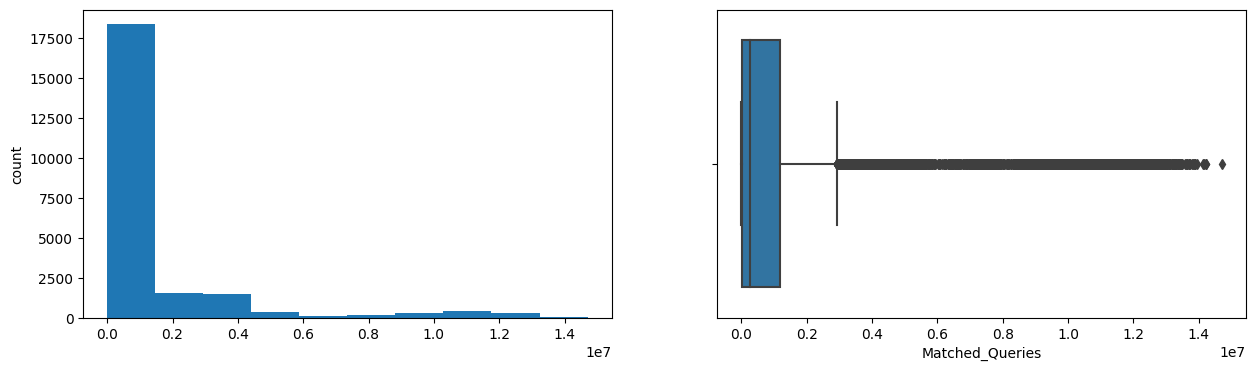

Impressions
Skew : 2.97


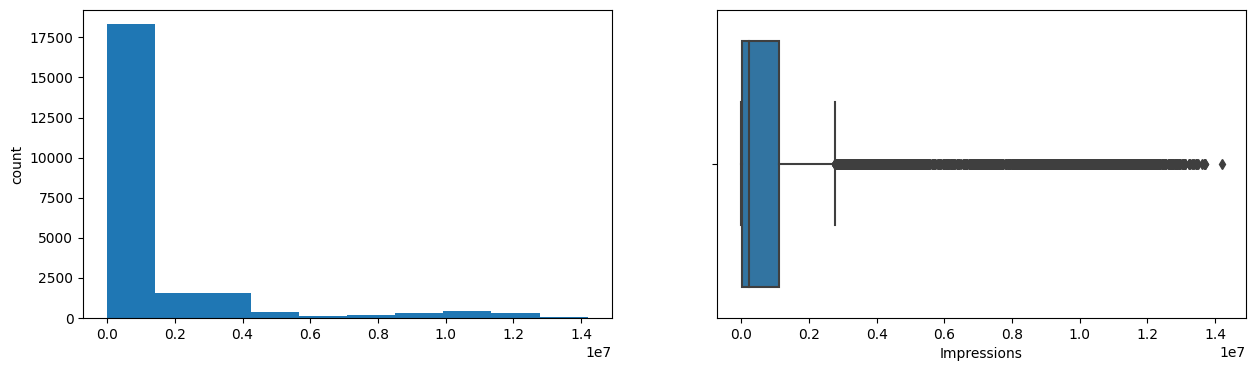

Clicks
Skew : 2.94


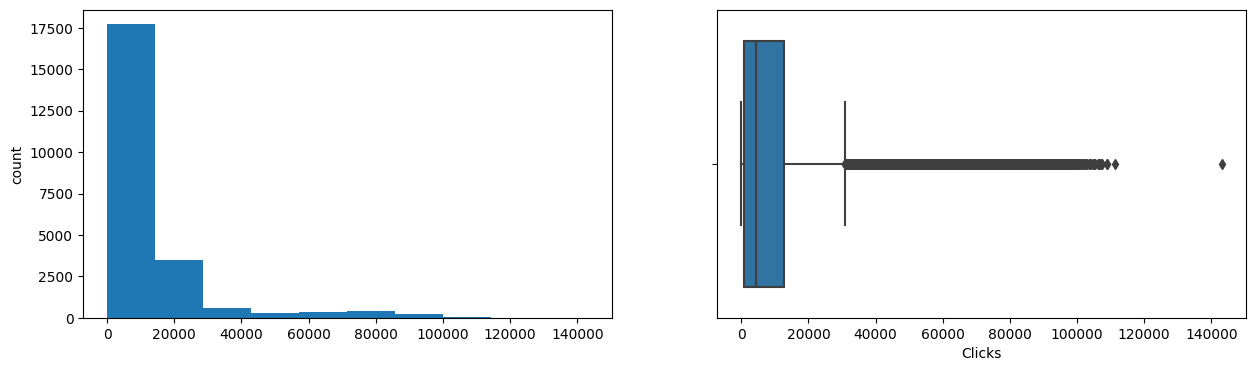

Spend
Skew : 2.58


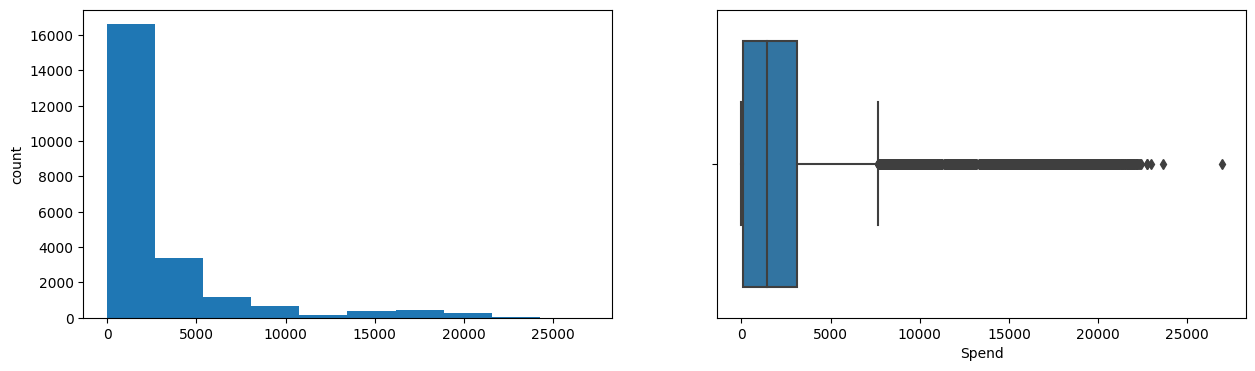

Fee
Skew : -2.3


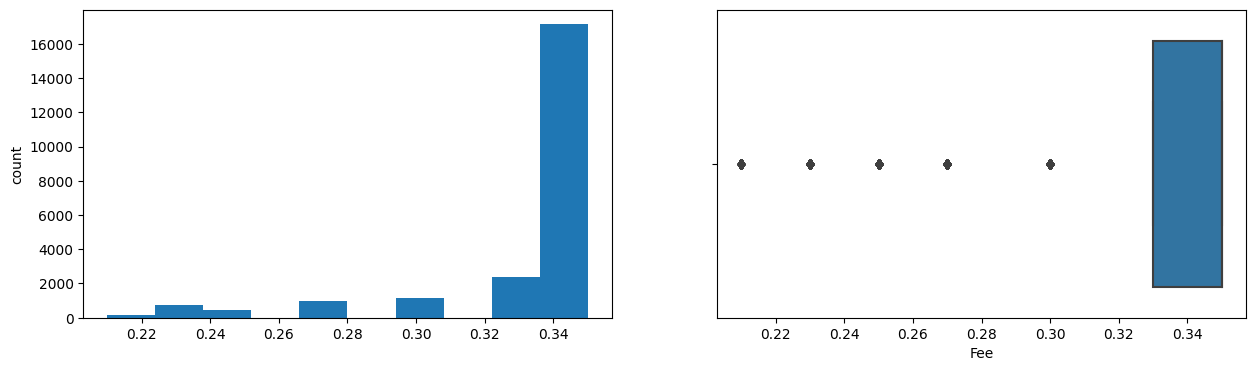

Revenue
Skew : 2.79


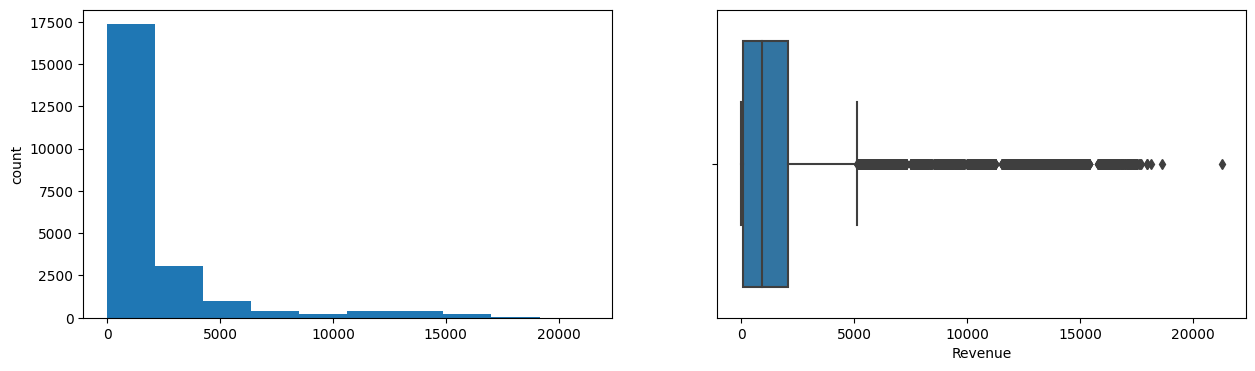

CTR
Skew : 0.84


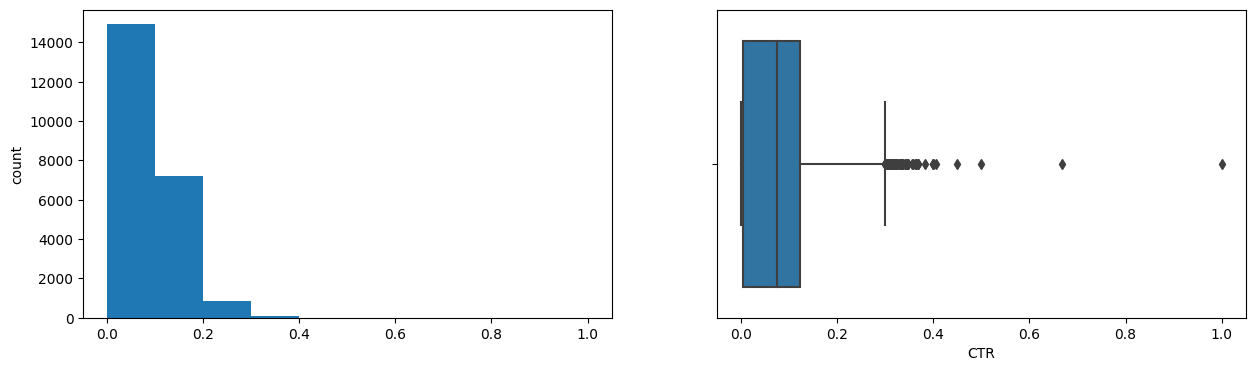

CPM
Skew : 0.84


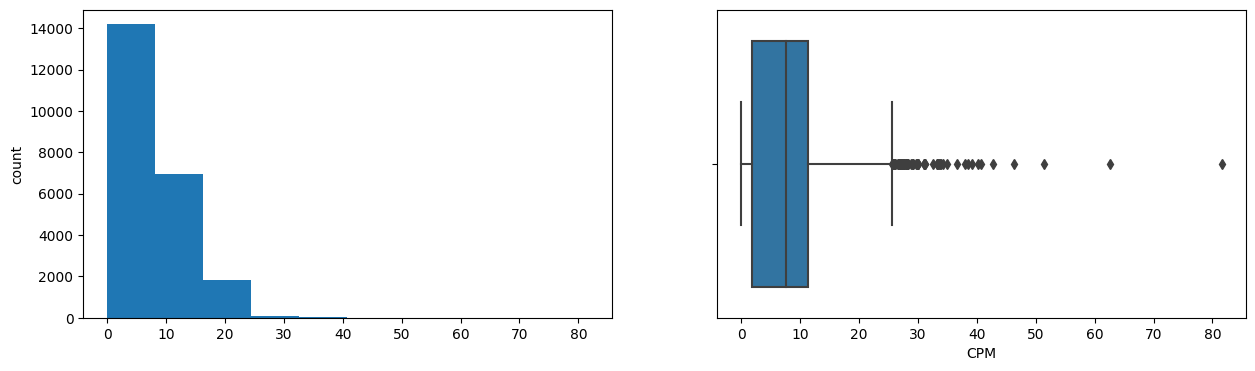

CPC
Skew : 2.08


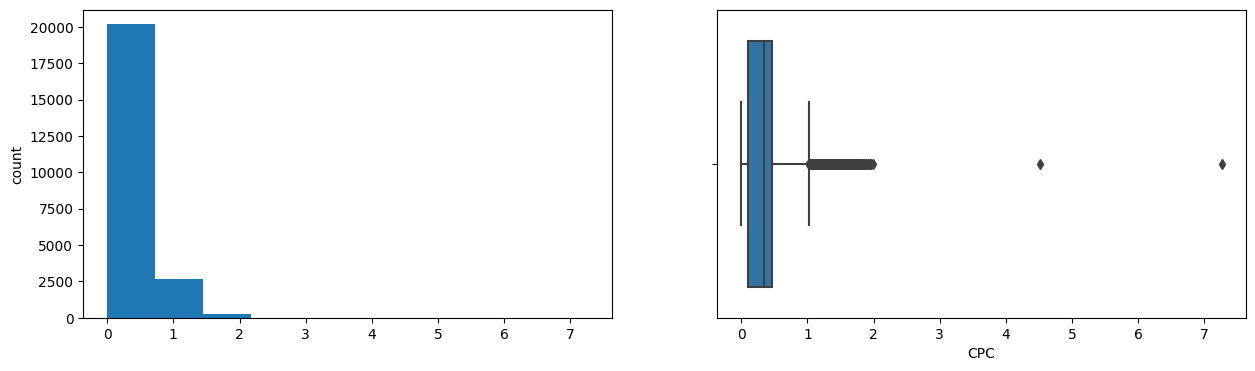

In [40]:
for col in new_df.columns[1:]:
    print(col)
    print('Skew :',round(new_df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    new_df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=new_df[col])
    plt.show()

Observations:

As observed earlier, most of the variables have skewed distributions

Except fee variable which is skewed to the left are right skewed. 
All these variables have some outliers to the right except Fee.
Treating outlires will not make much of diffrence hence going ahead with the same data for further analysis. 

Scaling the data

Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [41]:
#Scaling the data and storing the output as a new dataframe
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
data_scaled.head() 

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.352218,-0.512407,-0.515248,-0.510918,-0.615311,-0.665372,0.465447,-0.619693,-1.053155,-1.327883,-1.14705
1,-0.364496,-0.432797,-0.352218,-0.512413,-0.515264,-0.510933,-0.615311,-0.665372,0.465447,-0.619693,-1.047185,-1.327883,-1.14705
2,-0.364496,-0.432797,-0.352218,-0.512213,-0.515235,-0.510905,-0.615311,-0.665372,0.465447,-0.619693,-1.057633,-1.327883,-1.14705
3,-0.364496,-0.432797,-0.352218,-0.512276,-0.515179,-0.510847,-0.615311,-0.665372,0.465447,-0.619693,-1.069573,-1.327883,-1.14705
4,-0.364496,-0.432797,-0.352218,-0.512531,-0.515281,-0.510951,-0.615311,-0.665372,0.465447,-0.619693,-1.038230,-1.327883,-1.14705


In [51]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,1.281478e-16,1.000022,-1.134891,-1.134891,-3.644957e-01,1.433093,1.467332
Ad- Width,23066.0,-1.182903e-16,1.000022,-1.319110,-0.432797,-1.865987e-01,1.290590,1.290590
Ad Size,23066.0,2.464381e-17,1.000022,-1.024985,-0.400970,-4.009697e-01,-0.205965,1.939086
Available_Impressions,23066.0,-1.971505e-17,1.000022,-0.512788,-0.505688,-4.107866e-01,0.020171,5.305072
Matched_Queries,23066.0,-5.914515e-17,1.000022,-0.515377,-0.508102,-4.126727e-01,-0.045524,5.335208
Impressions,23066.0,-1.971505e-17,1.000022,-0.511050,-0.507761,-4.183138e-01,-0.053138,5.331990
Clicks,23066.0,-3.943010e-17,1.000022,-0.615311,-0.574454,-3.603704e-01,0.121894,7.628089
Spend,23066.0,-3.943010e-17,1.000022,-0.665372,-0.644432,-3.150323e-01,0.101964,5.955310
Fee,23066.0,6.703117e-16,1.000022,-3.914682,-0.160285,4.654474e-01,0.465447,0.465447
Revenue,23066.0,7.886020e-17,1.000022,-0.619693,-0.601863,-3.213727e-01,0.053809,6.232161


In [42]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

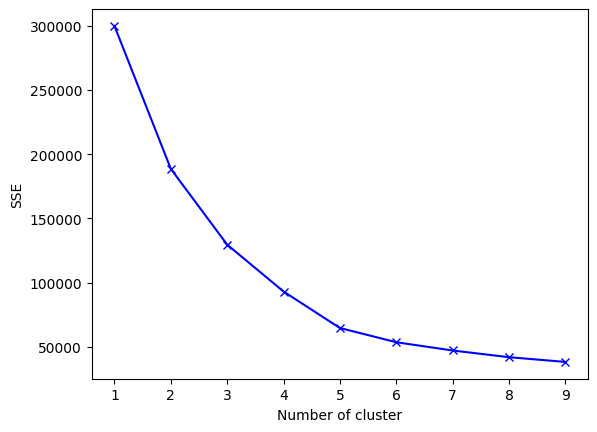

In [43]:
#Empty dictionary to store the SSE for each value of k
sse = {} 
# iterate for a range of Ks and fit the scaled data to the algorithm. 
#Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range (1, 10):
  kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
  sse[k]= kmeans.inertia_
  #Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()



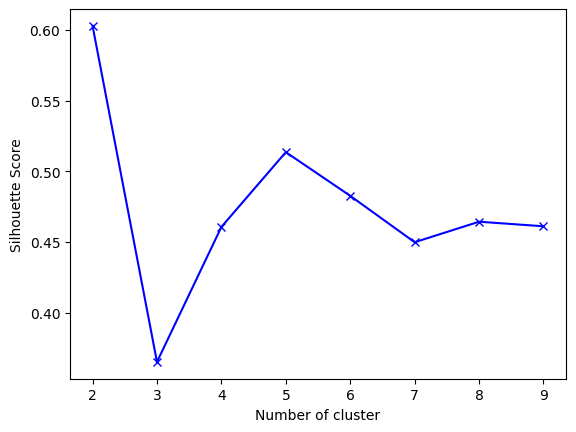

In [49]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [50]:
for n_cluster in range(2, 10):
  kmeans = KMeans(n_clusters=n_cluster).fit(data_scaled)
  label = kmeans.labels_
  sil_coeff = silhouette_score(data_scaled, label, metric='euclidean')
  print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.602856419557812
For n_clusters=3, The Silhouette Coefficient is 0.3652575679239419
For n_clusters=4, The Silhouette Coefficient is 0.46072044314349486
For n_clusters=5, The Silhouette Coefficient is 0.5135883146481809
For n_clusters=6, The Silhouette Coefficient is 0.4826959081616031
For n_clusters=7, The Silhouette Coefficient is 0.44949580299210745
For n_clusters=8, The Silhouette Coefficient is 0.46442872466744733
For n_clusters=9, The Silhouette Coefficient is 0.46194271486474986


Hierarchical Clustering

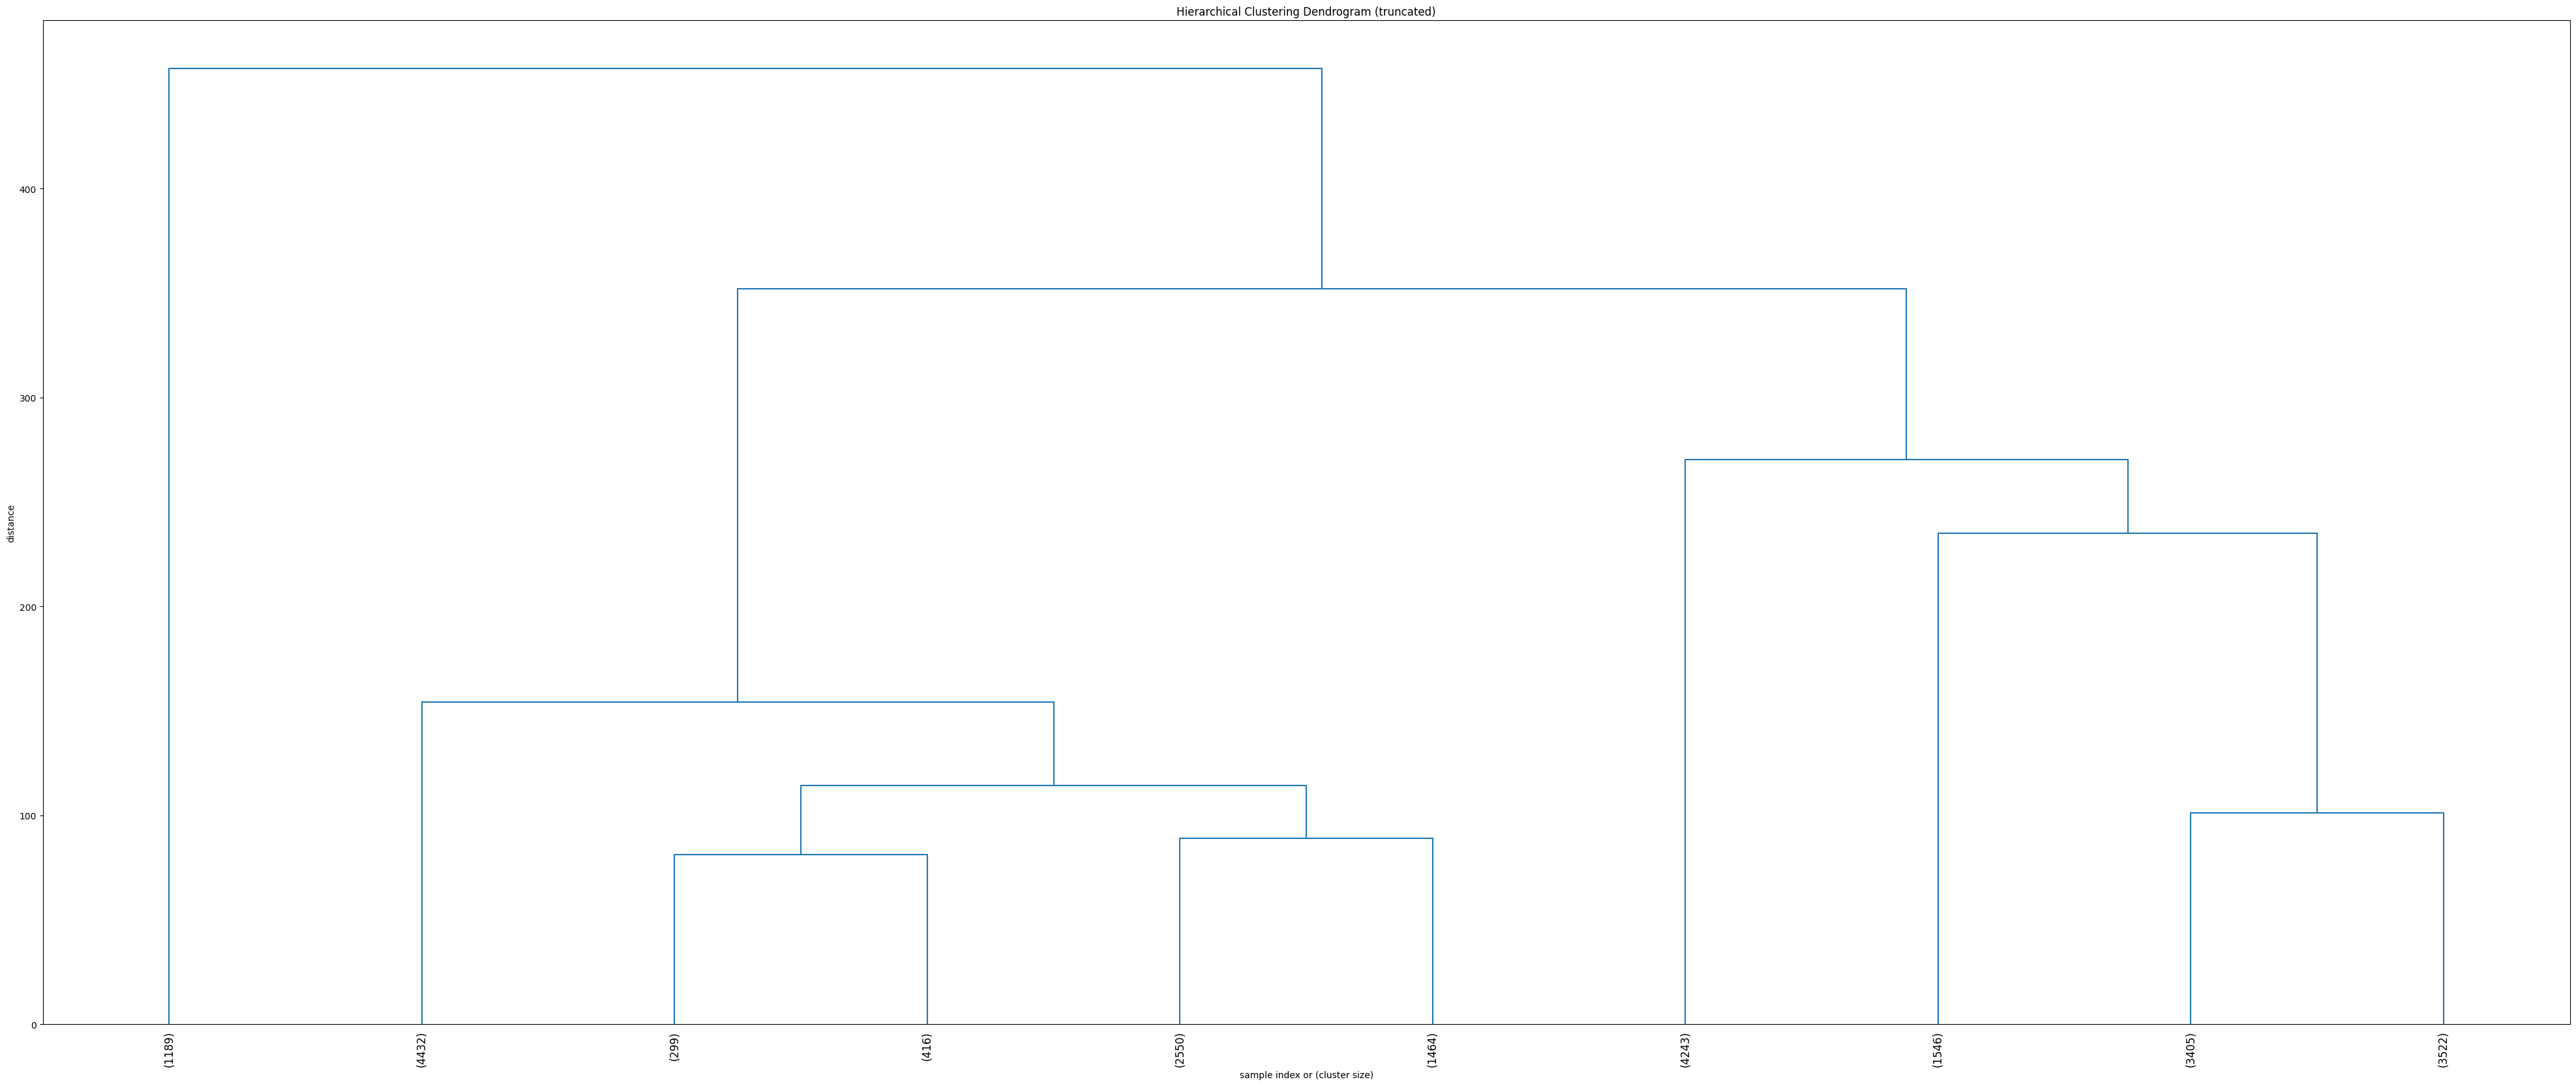

In [47]:
plt.figure(figsize=(50, 20))
Z_Final = linkage(data_scaled, 'ward', metric='euclidean') 
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

In [52]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
df['KMeans_Labels'] = kmeans.predict(data_scaled)

In [53]:
df['KMeans_Labels'].value_counts()

2    8901
0    7217
3    4246
1    1360
4    1342
Name: KMeans_Labels, dtype: int64

In [55]:
#Calculating mean and median of the original data for each label
mean = df.groupby('KMeans_Labels').mean()
median = df.groupby('KMeans_Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean','group_3 Mean','group_4 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median','group_3 Median','group_4 Median'] 
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_4 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median,group_4 Median
Ad - Length,155.486213,6.835235e+02,4.027040e+02,720.000000,142.211624,120.0000,7.280000e+02,3.360000e+02,720.00000,120.0000
Ad- Width,554.558681,1.170294e+02,1.787777e+02,300.000000,571.833085,600.0000,9.000000e+01,2.500000e+02,300.00000,600.0000
Ad Size,78177.081890,7.011300e+04,6.194715e+04,216000.000000,75862.891207,72000.0000,6.552000e+04,7.500000e+04,216000.00000,72000.0000
Available_Impressions,55571.242622,1.909973e+07,3.090763e+06,244030.164390,874662.649031,16902.0000,1.952822e+07,2.509763e+06,205160.50000,897163.5000
Matched_Queries,34565.784952,1.015084e+07,1.621297e+06,133484.404852,611191.390462,9587.0000,1.048286e+07,1.167627e+06,133414.00000,622890.0000
Impressions,26352.375641,9.775977e+06,1.570418e+06,113278.588318,515724.220566,4234.0000,1.007452e+07,1.101804e+06,112789.50000,526286.0000
Clicks,3603.647638,1.867270e+04,4.572747e+03,14031.383891,70513.447839,506.0000,1.940650e+04,4.345000e+03,14330.00000,71808.0000
Spend,392.294742,1.624514e+04,2.514754e+03,1213.779016,7428.407444,53.3300,1.641979e+04,1.926840e+03,1305.58500,7489.4450
Fee,0.349419,2.352794e-01,3.398820e-01,0.349543,0.282235,0.3500,2.300000e-01,3.500000e-01,0.35000,0.2700
Revenue,257.278546,1.246621e+04,1.688014e+03,790.501469,5359.532972,34.6700,1.264324e+04,1.252450e+03,848.63025,5467.2950




Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]


Conclude the project by providing summary of your learnings.

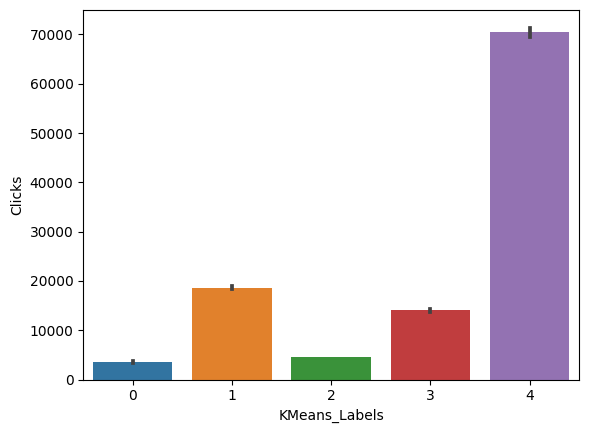

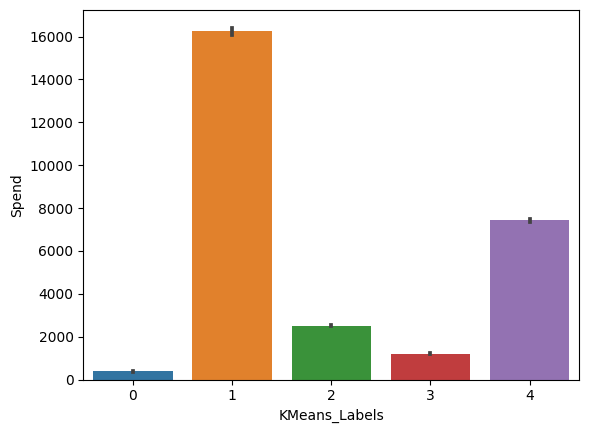

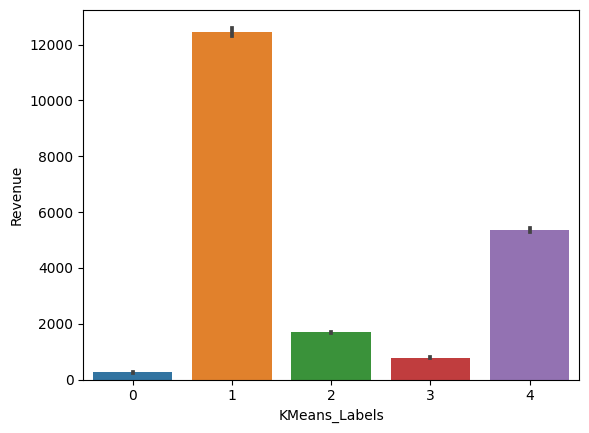

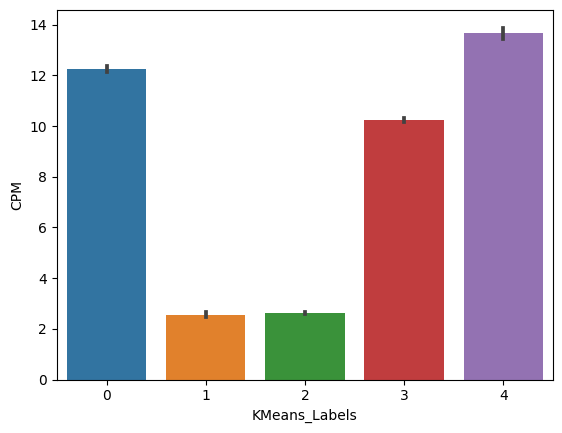

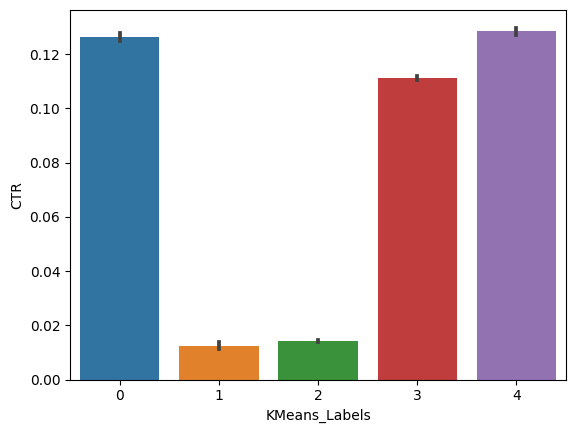

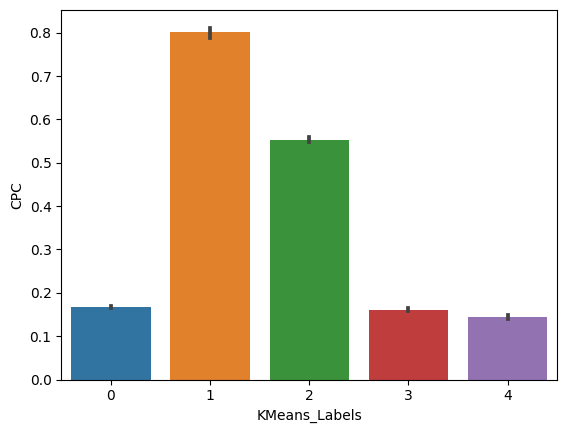

In [56]:
cols_visualise = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']
for col in cols_visualise:
    sns.barplot(x = 'KMeans_Labels', y = col, data = df)
    plt.show()

In [57]:
# k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
df['cluster'] = kmeans.labels_
df.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})


,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,14031.383891,1213.779016,790.501469,10.245675,0.111217,0.160701
1,4572.746545,2514.753548,1688.014445,2.613998,0.014197,0.552883
2,3603.647638,392.294742,257.278546,12.245461,0.126262,0.167894
3,18672.698529,16245.137625,12466.210240,2.554646,0.012463,0.800619
4,70513.447839,7428.407444,5359.532972,13.668593,0.128372,0.144172


In [58]:
# k = 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
df['cluster'] = kmeans.labels_
df.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})


,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,4522.403803,2484.175043,1667.160963,2.666739,0.014806,0.550396
1,14254.267990,1512.440606,1069.249511,12.524156,0.127220,0.162158
2,14031.383891,1213.779016,790.501469,10.245675,0.111217,0.160701
3,18633.065201,16219.659780,12445.542144,2.556052,0.012476,0.801262


In [59]:
# k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
df['cluster'] = kmeans.labels_
df.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})


,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,13978.058951,1401.515301,967.910749,11.641366,0.120424,0.165174
1,4582.625854,2530.940113,1699.264691,2.621046,0.014294,0.555089
2,18672.698529,16245.137625,12466.210240,2.554646,0.012463,0.800619


In [61]:
# k = 2
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
df['cluster'] = kmeans.labels_
df.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})


,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,17767.895522,15651.044661,11985.700180,2.543173,0.012061,0.829323
1,10194.555252,1822.961667,1237.397286,8.022173,0.077866,0.318412


In [65]:
#Method 1

clusters_5 = shc.fcluster(shc.linkage(data_scaled, method='ward'), 5, criterion='maxclust')# Here 5 is number of clusters we want
clusters_5

array([2, 2, 2, ..., 3, 5, 3], dtype=int32)

In [66]:
df['cluster_5']= clusters_5
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Spend,Fee,Revenue,CTR,CPM,CPC,KMeans_Labels,cluster,cluster_1,cluster_5
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,0.0,0.35,0.0,0.0031,0.0,0.0,2,1,2,2
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,0.0,0.35,0.0,0.0035,0.0,0.0,2,1,2,2
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,0.0,0.35,0.0,0.0028,0.0,0.0,2,1,2,2
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,0.0,0.35,0.0,0.0020,0.0,0.0,2,1,2,2
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,0.0,0.35,0.0,0.0041,0.0,0.0,2,1,2,2
